# Quantum Computing Summer Training Project  
### Based on the paper: *A Minimal Introduction to Quantum Computing* (Mahmud & Goldsmith, 2025)  

---

## Project Overview  

This notebook is part of the final project submission for the **Quantum Computing Summer Training 2025**.  
It is based on the research paper *A Minimal Introduction to Quantum Computing*, which provides a simplified  
introduction to quantum computing concepts using the quantum gate model.  

The notebook includes:  
- A theoretical overview of **Qubits, Quantum States, and Gates**.  
- Practical demonstrations using **Qiskit** for:  
  - Basic quantum gates (X, H, Z, CNOT).  
  - Superposition and measurement.  
  - Entanglement (Bell states).  
  - Tensor products and multi-qubit states.  
  - The **Deutsch–Jozsa Algorithm**.  
  - Classical vs Quantum gates (Toffoli demonstration).  
- Clear explanations before each code cell for better understanding.  

This project aims to show how the abstract mathematical ideas from the paper  
can be translated into practical simulations using **Qiskit**.  


## Importing Libraries  
In this cell we import all the required libraries for the project.  
- **qiskit**: to build and simulate quantum circuits.  
- **qiskit_aer**: provides simulators (statevector, aer_simulator).  
- **qiskit.visualization**: to visualize histograms and Bloch spheres.  
- **matplotlib**: for plotting support.  


In [44]:
# Core Qiskit imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# Visualization tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# For extra plotting
import matplotlib.pyplot as plt
import numpy as np


# Define simulators
sv_sim = Aer.get_backend('statevector_simulator')   # shows statevector
sim = Aer.get_backend('aer_simulator')             # full simulator with measurement

print(" Libraries imported successfully. Simulators are ready.")


 Libraries imported successfully. Simulators are ready.


## Qubits and Superposition  

A qubit can exist in the basis states |0⟩, |1⟩, or in a superposition of both.  
The Hadamard gate creates an equal superposition state.  

Mathematically:  

$$ |\psi⟩ = \alpha|0⟩ + \beta|1⟩, \quad |\alpha|^2 + |\beta|^2 = 1 $$  

Applying a Hadamard gate to $|0⟩$:  

$$ H|0⟩ = \frac{|0⟩ + |1⟩}{\sqrt{2}} $$  


Statevector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


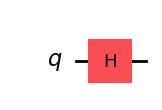

In [47]:
# Create a circuit with 1 qubit
qc = QuantumCircuit(1)
qc.h(0)   # Apply Hadamard gate

# Transpile the circuit for the simulator
tqc = transpile(qc, sv_sim)

# Run the transpiled circuit on the simulator
result = sv_sim.run(tqc).result()

# Extract the statevector
state = result.get_statevector()
print("Statevector:", state)

# Draw the circuit
qc.draw('mpl')


## Basic Quantum Gates  

We use quantum gates to manipulate qubits.  
- X flips |0⟩ ↔ |1⟩.  
- Z flips the phase of |1⟩.  
- H creates superposition.  
- CNOT flips the target if the control is |1⟩.  

Mathematically:  

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \quad 
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}, \quad 
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$  


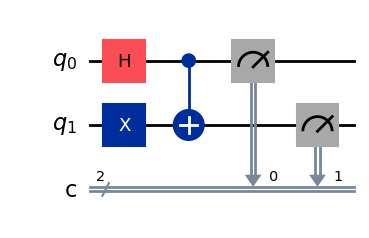

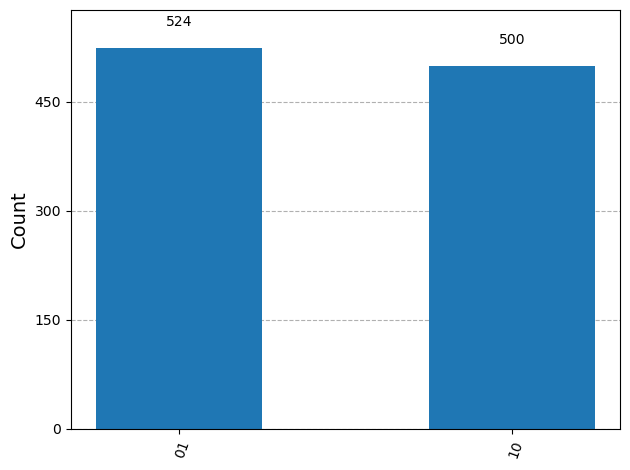

In [50]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.measure([0,1],[0,1])

display(qc.draw('mpl'))
tqc = transpile(qc, sim)
counts = sim.run(tqc, shots=1024).result().get_counts()
plot_histogram(counts)


## Inner and Outer Products  

The dot (inner) product shows overlap between states,  
while the outer product creates a matrix from two vectors.  

Formulas:  

- Inner product:  
$$ \langle \phi | \psi \rangle = \sum_i \phi_i^* \psi_i $$  

- Outer product:  
$$ |\phi⟩ \langle \psi| $$  


In [53]:
phi = np.array([1/np.sqrt(2), 0, 1/np.sqrt(2)])   # (|1> + |3>)/√2
psi = np.array([1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]) # (|1>+|2>+|3>)/√3

dot = np.vdot(phi, psi)
outer = np.outer(phi, psi)

print("⟨φ|ψ⟩ =", dot)
print("Outer product:\n", outer)


⟨φ|ψ⟩ = 0.816496580927726
Outer product:
 [[0.40824829 0.40824829 0.40824829]
 [0.         0.         0.        ]
 [0.40824829 0.40824829 0.40824829]]


## Entanglement (Bell States)  

Entanglement links qubits so that measuring one determines the other.  
Example: the Bell state creates perfect correlation.  

Mathematically:  

$$ |\psi⟩ = \frac{|00⟩ + |11⟩}{\sqrt{2}} $$  


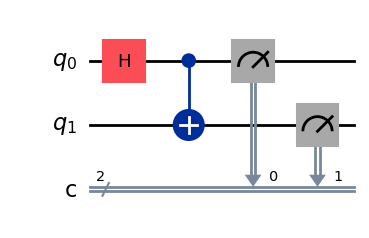

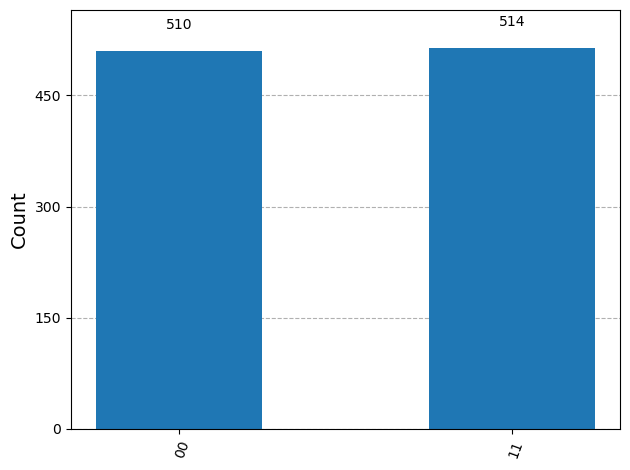

In [42]:
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0,1)
bell.measure([0,1],[0,1])

display(bell.draw('mpl'))
tqc = transpile(bell, sim)
counts = sim.run(tqc, shots=1024).result().get_counts()
plot_histogram(counts)


## Tensor Products  

Tensor products combine qubits into larger systems.  
For example, |0⟩ ⊗ |1⟩ = |01⟩.  

Formula:  

If $|a⟩ = [a_1, a_2]$ and $|b⟩ = [b_1, b_2]$, then:  

$$ |a⟩ \otimes |b⟩ = [a_1b_1, a_1b_2, a_2b_1, a_2b_2] $$  


In [55]:
a = np.array([1,0])  # |0>
b = np.array([0,1])  # |1>
tensor = np.kron(a,b)
print("Tensor product |0>⊗|1> =", tensor)


Tensor product |0>⊗|1> = [0 1 0 0]


## Measurement and Probabilities  

When measuring, the qubit collapses into |0⟩ or |1⟩.  
The chance depends on the squared amplitude.  

Formula:  

$$ P(0) = |\alpha|^2, \quad P(1) = |\beta|^2 $$  


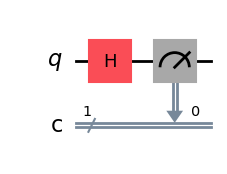

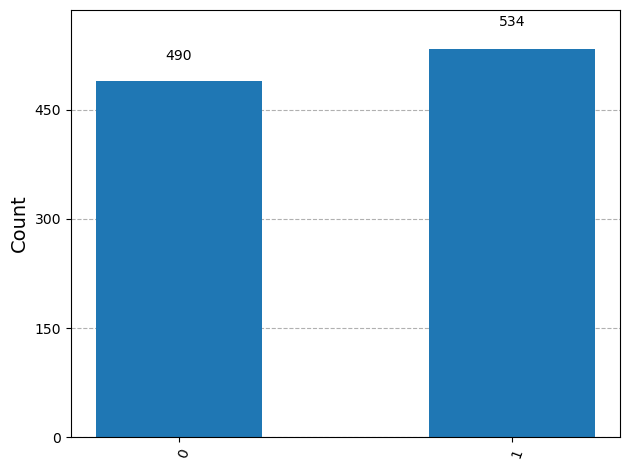

In [57]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

display(qc.draw('mpl'))
tqc = transpile(qc, sim)
counts = sim.run(tqc, shots=1024).result().get_counts()
plot_histogram(counts)


## Deutsch–Jozsa Algorithm  

This algorithm checks if a function is constant or balanced.  
Quantum computing solves it in one step instead of many.  

Mathematically:  
- Constant function → output = all 0.  
- Balanced function → output ≠ all 0.  


In [59]:
def dj_circuit(oracle_qc, n=2):
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.append(oracle_qc.to_instruction(), range(n+1))
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

oracle_const = QuantumCircuit(3)  # constant
oracle_bal = QuantumCircuit(3)    # balanced
oracle_bal.cx(0,2)
oracle_bal.cx(1,2)

qc_const = dj_circuit(oracle_const)
qc_bal = dj_circuit(oracle_bal)

tqc = transpile(qc_const, sim)
counts_const = sim.run(tqc, shots=1024).result().get_counts()

tqc = transpile(qc_bal, sim)
counts_bal = sim.run(tqc, shots=1024).result().get_counts()

print("Constant Oracle:", counts_const)
print("Balanced Oracle:", counts_bal)


Constant Oracle: {'00': 1024}
Balanced Oracle: {'11': 1024}


## Toffoli Gate (CCX)  

The Toffoli gate acts like a quantum AND gate.  
It flips the target only if both controls are |1⟩.  

Matrix form (8x8):  

$$ CCX|110⟩ = |111⟩ $$  
$$ CCX|abc⟩ = |ab(c \oplus (a \land b))⟩ $$  


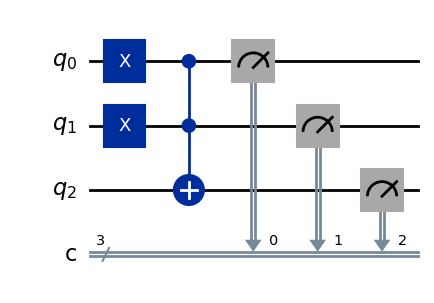

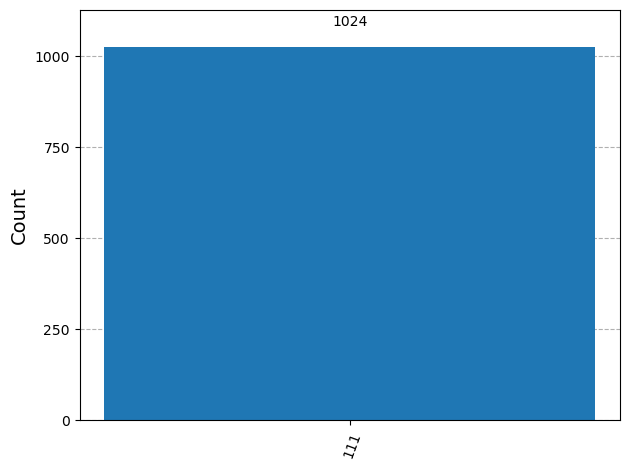

In [63]:
tc = QuantumCircuit(3,3)
tc.x(0); tc.x(1)
tc.ccx(0,1,2)
tc.measure([0,1,2],[0,1,2])

display(tc.draw('mpl'))
tqc = transpile(tc, sim)
counts = sim.run(tqc, shots=1024).result().get_counts()
plot_histogram(counts)


# Conclusion  

In this notebook, we explored the fundamental ideas of quantum computing as introduced in the paper  
*A Minimal Introduction to Quantum Computing*.  
We demonstrated how quantum principles such as **superposition, entanglement, and measurement**  
can be simulated using **Qiskit**.  

Key takeaways:  
- **Qubits** extend classical bits by allowing superpositions.  
- **Quantum gates** are unitary operations that manipulate quantum states.  
- **Entanglement** creates strong correlations not possible in classical systems.  
- The **Deutsch–Jozsa algorithm** shows how quantum algorithms can outperform classical ones.  

This project bridges theory and practice by combining the research paper with Qiskit implementations.  
It provides a clear, hands-on understanding of the concepts taught during the training.  

---

### Next Steps  
- Explore more advanced algorithms (Grover’s search, Simon’s algorithm).  
- Experiment with running circuits on real quantum hardware (IBM Quantum).  
- Continue studying from standard references like *Nielsen & Chuang*.  

**Thank you for reading this notebook!**  
